# Flood Frequency Analysis

Mitch Creelman

## Import Packages

In [10]:
import dataretrieval.nwis as nwis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Variables

In [11]:
# site number (add more for repeated layers)
usgs_site = ['13042500']

# dates of observation
start_date = '1970-10-01'
end_date = '2020-09-30'


## Pull the Data

In [12]:
# load in the flow data
df = nwis.get_record(sites = usgs_site , # input the site numbers
    service = 'dv' , # dv for daily values
    start = start_date , end = end_date, # start and end dates
    ) 



In [13]:
print(f'\n data types by column' )
display(df.dtypes)

print(f'\n data structure type' )
display(type(df))

print(f'\n Dataset Information' )
display(df.info())

print(f'List of different variables in each class: \n')
display(df.nunique())

print(f'\n Sample Statistics' )
display(df.describe())

print(f'\n Random Sample' )
display(df.sample(15))


 data types by column


00060_Mean       float64
00060_Mean_cd     object
site_no           object
dtype: object


 data structure type


pandas.core.frame.DataFrame


 Dataset Information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18263 entries, 1970-10-01 00:00:00+00:00 to 2020-09-30 00:00:00+00:00
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   00060_Mean     18263 non-null  float64
 1   00060_Mean_cd  18263 non-null  object 
 2   site_no        18263 non-null  object 
dtypes: float64(1), object(2)
memory usage: 570.7+ KB


None

List of different variables in each class: 



00060_Mean       1275
00060_Mean_cd       2
site_no             1
dtype: int64


 Sample Statistics


,00060_Mean
count,18263.000000
mean,642.285555
std,449.101776
min,1.100000
25%,291.000000
50%,549.000000
75%,879.500000
max,2990.000000



 Random Sample


,00060_Mean,00060_Mean_cd,site_no
datetime,,,
1991-03-12 00:00:00+00:00,186.0,A,13042500
1978-03-29 00:00:00+00:00,259.0,A,13042500
1986-05-12 00:00:00+00:00,1640.0,A,13042500
1980-08-27 00:00:00+00:00,573.0,A,13042500
1971-05-26 00:00:00+00:00,1440.0,A,13042500
2007-10-18 00:00:00+00:00,120.0,A,13042500
1990-01-10 00:00:00+00:00,326.0,A,13042500
1977-07-23 00:00:00+00:00,1540.0,A,13042500
1994-01-02 00:00:00+00:00,550.0,A,13042500


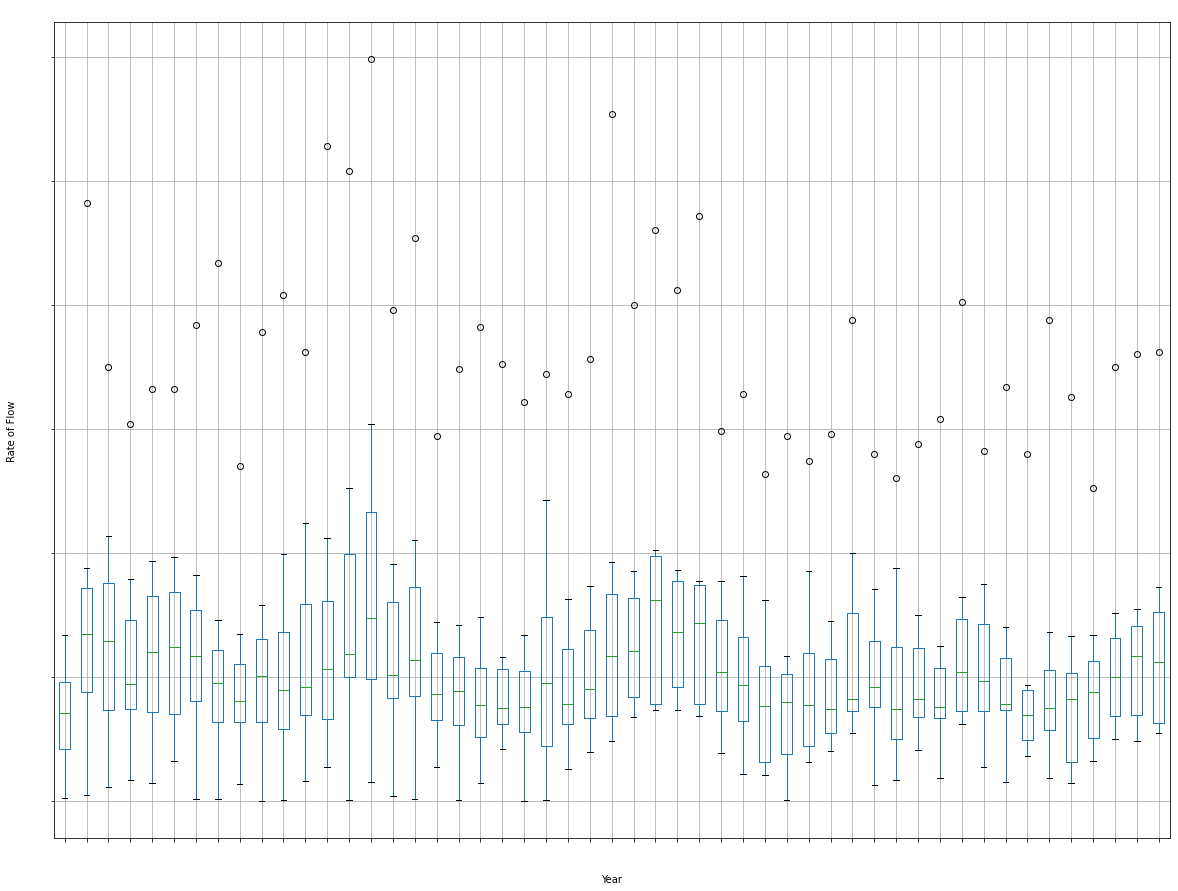

In [20]:
from logging.handlers import RotatingFileHandler
from turtle import color


fig = plt.figure(figsize = (20,15))
df['00060_Mean'].groupby(df.index.year).describe().T.boxplot()
ax = plt.gca()
plt.title('Yearly Distribution of Flows' , color = 'white')
plt.xticks(color = 'white')
plt.xlabel('Year')
plt.tick_params(axis='x', labelrotation = 45)
plt.ylabel('Rate of Flow')
plt.yticks(color = 'white')
plt.show()

In [30]:
q_ams = df['00060_Mean'].groupby(df.index.year).max().values # group the values by year
q_ams_sorted = np.sort(q_ams) # sort from high to low
q_ams_sorted

array([ 669., 1260., 1300., 1320., 1350., 1370., 1400., 1400., 1410.,
       1440., 1470., 1470., 1480., 1490., 1520., 1540., 1610., 1630.,
       1640., 1640., 1660., 1660., 1670., 1720., 1740., 1750., 1750.,
       1760., 1780., 1800., 1810., 1810., 1890., 1910., 1920., 1940.,
       1940., 1980., 2000., 2010., 2040., 2060., 2170., 2270., 2300.,
       2360., 2410., 2540., 2640., 2770., 2990.])